In [1]:
import pandas as pd
import numpy as np
import os
from time import time

In [2]:
import datetime

In [3]:
n = ['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Ignore']

In [4]:
df = pd.read_csv('origin_data/BTCUSDT/BTCUSDT-1m-2017-08.csv',names = n)

In [7]:
sorted(os.listdir('origin_data'))

['.DS_Store',
 '._.DS_Store',
 '.ipynb_checkpoints',
 'ADAUSDT',
 'ATOMUSDT',
 'AVAXUSDT',
 'BCCUSDT',
 'BCHUSDT',
 'BNBUSDT',
 'BTCUSDT',
 'BTCUSDT30m',
 'BTCUSDT_1',
 'BTCUSDT_15m',
 'DAIUSDT',
 'DOGEUSDT',
 'DOTUSDT',
 'EOSUSDT',
 'ETCUSDT',
 'ETHUSDT',
 'ICPUSDT',
 'IOTAUSDT',
 'LINKUSDT',
 'LTCUSDT',
 'NEOUSDT',
 'QTUMUSDT',
 'SOLUSDT',
 'TRXUSDT',
 'TUSDUSDT',
 'XRPUSDT',
 '{root}']

In [6]:
c_list =  ['BTCUSDT','ETHUSDT','BNBUSDT','SOLUSDT','LTCUSDT','DOGEUSDT','TRXUSDT','XRPUSDT','AVAXUSDT',
    'LINKUSDT','DOTUSDT','TONUSDT','ICPUSDT','BCHUSDT','ETCUSDT'] # DAI의 경우 거래량이 매우 적어서 뺌

In [372]:
from tqdm import tqdm
minute_csv = '5m' # or '1m'
for root in tqdm(sorted(os.listdir('origin_data'))):
    count = 0
    if root in c_list:
        for i in sorted(os.listdir(os.path.join('origin_data',root))):
            if minute_csv in i:
                if count == 0:
                    df = pd.read_csv(f'origin_data/{root}/{i}',names = n)
                    count+=1
                else:
                    df1 = pd.read_csv(f'origin_data/{root}/{i}',names = n)
                    df = pd.concat([df,df1],axis = 0)
                    count +=1
        epochtime = df['Open time'].values 
        year = []
        month = []
        day = []
        weekday = []
        hour = []
        minute = []
        for t in epochtime:
            date = datetime.datetime.fromtimestamp(t/1000)
            year.append(date.year)
            month.append(date.month)
            day.append(date.day)
            weekday.append(date.weekday())
            hour.append(date.hour)
            minute.append(date.minute)
        df['year'] = year
        df['month'] = month
        df['day'] = day
        df['weekday'] = weekday
        df['hour'] = hour
        df['minute'] = minute
        df.to_csv(f'data/{root}_{minute_csv}.csv',index = False)

 10%|████▌                                       | 3/29 [00:02<00:17,  1.45it/s]


KeyboardInterrupt: 

In [9]:
os.listdir('data')
df_list = []
minute_csv = '5m'
for i in os.listdir('data'):
    if i.split('csv')[0].split('_')[0] in c_list and minute_csv in i.split('csv')[0]:
        df_list.append(os.path.join('data',i))
print(df_list)

['data\\AVAXUSDT_5m.csv', 'data\\BCHUSDT_5m.csv', 'data\\BNBUSDT_5m.csv', 'data\\BTCUSDT_5m.csv', 'data\\DOGEUSDT_5m.csv', 'data\\DOTUSDT_5m.csv', 'data\\ETCUSDT_5m.csv', 'data\\ETHUSDT_5m.csv', 'data\\ICPUSDT_5m.csv', 'data\\LINKUSDT_5m.csv', 'data\\LTCUSDT_5m.csv', 'data\\SOLUSDT_5m.csv', 'data\\TRXUSDT_5m.csv', 'data\\XRPUSDT_5m.csv']


In [10]:
len(df_list)

14

In [13]:
import pdb
from tqdm import tqdm # 1m dataset
vol_data = []
price_data = []
price_hour = []
month = []
day = []
weekday = []
hour = []
name_list = []
year = []
max_vol_list = []
rv_full = []
#vol_hour = []
for name in tqdm(df_list):
    df = pd.read_csv(name)
    term = 6 # 1m = 24
    sample_size = 72 #5m(6hour) = 72 1m = 60
    length = df.shape[0]//sample_size
    pad = 0
    vol_list = []
    year_list = []
    month_list = []
    day_list = []
    weekday_list = []
    hour_list = []
    pr = []
    pr_hour = []
    max_vol = []
    rv_list = []
   # v_hour = []
    for i in range(length):
        try:
            if 'BTC' in name:
                pdb.set_trace()
            vol = []
            rv_vol_o = []
            rv_vol_c = []
            rs_term = []
            year_list.append(df.iloc[pad]['year'])
            month_list.append(df.iloc[pad]['month'])
            day_list.append(df.iloc[pad]['day'])
            weekday_list.append(df.iloc[pad]['weekday'])
            hour_list.append(df.iloc[pad]['hour'])
            h_p = np.array(df.iloc[pad : pad + sample_size]['High'].values)
            l_p = np.array(df.iloc[pad : pad + sample_size]['Low'].values)
            o_p = np.array(df.iloc[pad : pad + sample_size]['Open'].values)
            op_mean = o_p.mean()
            c_p = np.array(df.iloc[pad : pad + sample_size]['Close'].values)
            cp_mean = c_p.mean()
            close_p = np.array(df.iloc[pad + sample_size]['Close'])
            if i == 0:
                o_p = np.log(o_p)
            else:
                o_p = np.log(o_p) - np.log(c_p_temp)
                op_mean = o_p.mean()
                u_p = np.log(h_p) - np.log(o_p)
                d_p = np.log(l_p) - np.log(o_p)
                c_p = np.log(c_p) - np.log(o_p)
                cp_mean = c_p.mean()
            c_p_temp = np.array(df.iloc[pad : pad + sample_size]['Close'].values)
            for j in range(sample_size):
                rv_vol_o.append((o_p[j] - op_mean)**2)
                rv_vol_c.append((c_p[j] - cp_mean**2))
                rs_term.append(u_p[j] * (u_p[j] - c_p[j]) + d_p[j]*(d_p[j] - c_p[j]))
            for j_1 in range(1,sample_size):
                vol.append(np.log(c_p[j_1]/c_p[j_1-1])) # 해당 함수 변형하여 Volatility 계산하기
            v_o = sum(rv_vol_o) / (sample_size-1)
            v_c = sum(rv_vol_c) / (sample_size-1)
            rs = sum(rs_term)/(sample_size)
            k_tem = 0.34
            rv_k = k_tem/ (1 + k_tem + (sample_size+1)/(sample_size-1))
            rv_list.append(np.sqrt(v_o + rv_k*v_c + (1-rv_k)*rs))
            vol = np.array(vol)
            vol_list.append(vol.std()*np.sqrt(sample_size))
            pad += sample_size
            pr.append(close_p)
            pr_hour.append(c_p)
        except Exception as e:
            print(e)
            pass
    #vol_hour.append(v_hour)
    price_data.append(pr)
    price_hour.append(pr_hour)
    year.append(year_list)
    month.append(month_list)
    day.append(day_list)
    weekday.append(weekday_list)
    hour.append(hour_list)
    vol_list = np.array(vol_list) # 1m 데이터에 대한 1시간 Volatility
    vol_data.append(vol_list)
    rv_full.append(np.array(rv_list))
    print(name)
    name_list.append(name.split('/')[1].split('_')[0])

  0%|                                                                                           | 0/14 [00:00<?, ?it/s]C:\Users\user\AppData\Local\Temp\ipykernel_3560\407486903.py:57: RuntimeWarning: invalid value encountered in log
  u_p = np.log(h_p) - np.log(o_p)
C:\Users\user\AppData\Local\Temp\ipykernel_3560\407486903.py:58: RuntimeWarning: invalid value encountered in log
  d_p = np.log(l_p) - np.log(o_p)
C:\Users\user\AppData\Local\Temp\ipykernel_3560\407486903.py:59: RuntimeWarning: invalid value encountered in log
  c_p = np.log(c_p) - np.log(o_p)
C:\Users\user\AppData\Local\Temp\ipykernel_3560\407486903.py:73: RuntimeWarning: invalid value encountered in sqrt
  rv_list.append(np.sqrt(v_o + rv_k*v_c + (1-rv_k)*rs))
C:\Users\user\AppData\Local\Temp\ipykernel_3560\407486903.py:57: RuntimeWarning: divide by zero encountered in log
  u_p = np.log(h_p) - np.log(o_p)
C:\Users\user\AppData\Local\Temp\ipykernel_3560\407486903.py:58: RuntimeWarning: divide by zero encountered in log
  

data\AVAXUSDT_5m.csv


IndexError: list index out of range

In [15]:
o_p

array([ 0.00201359,  0.00376365,  0.00976839,  0.01075145,  0.01051324,
        0.01001761,  0.01301971,  0.00851495,  0.01103875,  0.01304584,
        0.00655575,  0.00226843, -0.00201664, -0.00050314,  0.00326265,
       -0.00225762, -0.00225366, -0.00924198, -0.00624768, -0.00624144,
       -0.00375423, -0.00174891, -0.00797015, -0.00624924, -0.00977329,
       -0.01227009, -0.01051587, -0.01153762, -0.01227317, -0.01001761,
       -0.00401708, -0.00301281, -0.00351582, -0.00702814, -0.00827591,
       -0.01228547, -0.00751695, -0.01277412, -0.0100126 , -0.01225475,
       -0.01851905, -0.02425422, -0.02655467, -0.01928193, -0.02354228,
       -0.02711009, -0.02914779, -0.03013789, -0.02611901, -0.02363106,
       -0.01658746, -0.01582351, -0.01256614, -0.01307866, -0.01504165,
       -0.01503034, -0.01050272, -0.00949058, -0.00924429, -0.01149438,
       -0.01228547, -0.01100837, -0.00850856, -0.0072582 , -0.00650653,
       -0.01130239, -0.00704405, -0.00981017, -0.01057412, -0.01

In [420]:
pad_index = np.array(['BTC' in i for i in np.array(df_list)]).argmax()

In [421]:
cov_index = 2

In [422]:
k=0
for i in price_data:
    price_data[k] = np.array(i)
    k+=1

In [423]:
def padding_vol(pdg):
    k = 0
    for i in pdg:
        
        if k < i.shape[0]:
            k=i.shape[0]
    length = k
    l_list = []
    for i in pdg:
        l_list.append(int(length - i.shape[0]))
    return l_list

In [424]:
z = 0
for i in price_hour:
    k=0
    for j in i:
        price_hour[z][k] = np.array(j)
        k+=1
    price_hour[z] = np.array(price_hour[z])
    z+=1

In [425]:
pad_list = []
for i in price_hour:
    ma = price_hour[pad_index].shape[0] # BTCLENTH
    pad_list.append(len([i for i in range(ma - i.shape[0])]))

In [426]:
for i in range(len(price_hour)):
    pad = np.zeros((pad_list[i],price_hour[i].shape[1]))
    price_hour[i] = np.concatenate((pad,price_hour[i]),axis=0)

In [427]:
price_hour = np.array(price_hour)

In [428]:
pad_list = padding_vol(price_data)
for i in range(len(price_data)):
    price_data[i] = np.append(np.zeros(pad_list[i]),price_data[i])

In [429]:
price_data = np.array(price_data)

In [430]:
pad_list = padding_vol(vol_data)
for i in range(len(vol_data)):
    vol_data[i] = np.append(np.zeros(pad_list[i]),vol_data[i])

In [431]:
pad_list = padding_vol(rv_full)
for i in range(len(rv_full)):
    rv_full[i] = np.append(np.zeros(pad_list[i]),rv_full[i])

In [432]:
coin_name = [i.split('/')[1].split('_')[0] for i in df_list]
vol_data = np.array(vol_data)
rv_full = np.array(rv_full)

In [433]:
for i in range(vol_data.shape[0]):
    year_1 = np.append(np.zeros(pad_list[i]),year[i])
    month1 = np.append(np.zeros(pad_list[i]),month[i])
    day1 = np.append(np.zeros(pad_list[i]),day[i])
    weekday1 = np.append(np.zeros(pad_list[i]),weekday[i])
    hour1 = np.append(np.zeros(pad_list[i]),hour[i])
    year[i] = year_1
    month[i] = month1
    day[i] = day1
    weekday[i] = weekday1
    hour[i] = hour1

In [434]:
full_n = ['price','month','day','weekday','hour']
meta_full = [ ]
for _ in range(len(name_list)):
    d = pd.DataFrame({'rv':rv_full[_],'price' : vol_data[_],'month':month[_],'day':day[_],'weekday':weekday[_],'hour':hour[_]})
    meta_full.append(d)

In [435]:
from scipy import stats
k=0
for c in meta_full:
    cov = c.iloc[:,cov_index:].copy()
    for f in cov.columns:
        cov_z = stats.zscore(cov.iloc[pad_list[k]:][f].values)
        cov[f] = np.append(np.zeros(pad_list[k]),cov_z)
    k+=1
    c.iloc[:,2:] = cov

In [436]:
for p in range(len(meta_full)):
    pricelist = []
    m = meta_full[p].price.values.max()
    count = 1e4
    mn = meta_full[p].price.values[pad_list[p]:].min()
    for j in range(pad_list[p]):
        pricelist.append(0)
    for l in meta_full[p].price.values[pad_list[p]:]:
        mp = (l - mn)/(m - mn)
        pricelist.append(mp)
    meta_full[p]['price'] = pricelist

In [437]:
for p in range(len(meta_full)):
    pricelist = []
    m = meta_full[p].rv.values.max()
    count = 1e4
    mn = meta_full[p].rv.values[pad_list[p]:].min()
    for j in range(pad_list[p]):
        pricelist.append(0)
    for l in meta_full[p].rv.values[pad_list[p]:]:
        mp = (l - mn)/(m - mn)
        pricelist.append(mp)
    meta_full[p]['rv'] = pricelist

In [438]:
def get_size(meta):
    train_size = 0
    for i in meta:
        if train_size <=i.shape[0]:
            train_size = i.shape[0]
    return int(train_size*0.7), int(train_size - int(train_size*0.7))

In [439]:
train_size,test_size = get_size(meta_full)

In [440]:
#meta = pd.concat([pd.concat([pd.Series(vol_data[0]),pd.Series(vol_data[1])],axis=1),pd.Series(np.append(np.zeros(pad),vol_data[2]))],axis=1)

In [441]:
#meta.to_csv('meta.csv',index = False)

In [442]:
from scipy.stats import skew
from scipy.stats import kurtosis
mean_coin = []
min_coin = []
max_coin = []
coin_25 = []
coin_50 = []
coin_75 = []
std_coin = []
count_coin = []
skew_coin = []
kurtois_coin = []
ADF_coin = []
for i in meta_full:
    mean_coin.append(i['price'].mean())
    min_coin.append(i['price'].min())
    max_coin.append(i['price'].max())
    coin_25.append(np.quantile(i['price'],0.25))
    coin_50.append(np.quantile(i['price'],0.50))
    coin_75.append(np.quantile(i['price'],0.75))
    std_coin.append(i['price'].std())
    skew_coin.append(skew(i['price']))
    kurtois_coin.append(kurtosis(i['price'], fisher=True))

In [443]:
train_data = []
test_data = []
for i in meta_full:
    train_data.append(i.iloc[:train_size,:].values)
    test_data.append(i.iloc[train_size:,:].values)
train_data = np.array(train_data)
test_data = np.array(test_data)

In [444]:
#train_size = meta.iloc[:int(meta.shape[0]*0.7)].shape[0]
#test_size = meta.shape[0]-train_size
#train = meta.iloc[:train_size].values
#test = meta.iloc[-test_size:].reset_index().drop(columns = {'index'}).values

In [445]:
price_train = []
price_test = []
for i in price_data:
    price_train.append(i[:train_size])
    price_test.append(i[train_size:])

In [446]:
np.save('price5m_test.npy',np.array(price_test))
np.save('price5m_train.npy',np.array(price_train))

In [492]:
train = np.transpose(train_data, (1,0,2))[:,:,0]
train_cov = np.transpose(train_data, (1,0,2))[:,name_list.index('BTCUSDT'),2:] # last is BTC
test = np.transpose(test_data, (1,0,2))[:,:,0]
test_cov = np.transpose(test_data, (1,0,2))[:,name_list.index('BTCUSDT'),2:]

In [493]:
test.shape

(2787, 14)

In [494]:
np.save('test_coin_5m_rv.npy',test)
np.save('test_coin_5m_cov_rv.npy',test_cov)

## DeepAR DATA PREP

In [449]:
from tqdm import tqdm
from tqdm import trange

In [464]:
def prep_data_full(data, covariates, data_start, train = True):
    #print("train: ", train)
    time_len = data.shape[0]
    #print("time_len: ", time_len)
    input_size = window_size-stride_size
    windows_per_series = np.full((num_series), (time_len-input_size) // stride_size)
    #print("windows pre: ", windows_per_series.shape)
    if train: windows_per_series -= (data_start+stride_size-1) // stride_size
    #print("data_start: ", data_start.shape)
    #print(data_start)
    #print("windows: ", windows_per_series.shape)
    #print(windows_per_series)
    total_windows = np.sum(windows_per_series)
    x_input = np.zeros((total_windows, window_size, 1 + num_covariates + 1), dtype='float32')
    label = np.zeros((total_windows, window_size), dtype='float32')
    v_input = np.zeros((total_windows, 2), dtype='float32')
    #cov = 3: ground truth + age + day_of_week + hour_of_day + num_series
    #cov = 4: ground truth + age + day_of_week + hour_of_day + month_of_year + num_series
    count = 0
    for series in trange(num_series):
        for i in range(windows_per_series[series]):
            if train:
                window_start = stride_size*i+data_start[series]
            else:
                window_start = stride_size*i    
            window_end = window_start+window_size
            '''
            print("x: ", x_input[count, 1:, 0].shape)
            print("window start: ", window_start)
            print("window end: ", window_end)
            print("data: ", data.shape)
            print("d: ", data[window_start:window_end-1, series].shape)
            '''
            x_input[count, 1:, 0] = data[window_start:window_end-1, series]
            x_input[count, :, 1:1+num_covariates] = covariates[window_start:window_end, :]
            x_input[count, :, -1] = series
            label[count, :] = data[window_start:window_end, series]
            nonzero_sum = (x_input[count, 1:input_size, 0]!=0).sum()
            if nonzero_sum == 0:
                v_input[count, 0] = 0
            else:
                v_input[count, 0] = np.true_divide(x_input[count, 1:input_size, 0].sum(),nonzero_sum)+1
                x_input[count, :, 0] = x_input[count, :, 0]/v_input[count, 0]
                if train:
                    label[count, :] = label[count, :]/v_input[count, 0]
            count += 1
    prefix = os.path.join('trainfull', 'train_' if train else 'test_')
    np.save(prefix+'data_'+save_name, x_input)
    np.save(prefix+'v_'+save_name, v_input)
    np.save(prefix+'label_'+save_name, label)

In [465]:
save_name = 'coin_5m_rv'
window_size = 48
stride_size = 6
num_covariates = 4
num_series = train.shape[1]
input_size = window_size-stride_size
windows_per_series = np.full((train.shape[1]), (train_size-input_size) // stride_size)
data_start_train=(train_data !=0).argmax(axis=1).T[0]
data_start_test=(test_data !=0).argmax(axis=1).T[0]

In [466]:
prep_data_full(train,train_cov,data_start_train,train = True)
prep_data_full(test,test_cov,data_start_test,train = False)

100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 155.36it/s]


In [477]:
train.shape

(6500, 14)

In [467]:
data_start_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [479]:
pd.DataFrame({'name' : name_list}).reset_index().to_csv('data/name_list_5m.csv',index = False)

## NBEATSX DATA PREP

In [468]:
window_size = 48
stride_size = 6
num_covariates = 0
num_series = 1
input_size = window_size-stride_size
windows_per_series = np.full((train.shape[1]), (train_size-input_size) // stride_size)
data_start_train=(train_data !=0).argmax(axis=1).T[0]
data_start_test=(test_data !=0).argmax(axis=1).T[0]

In [469]:
from tqdm import trange
import pdb
window_size = 48
stride_size = 6
num_covariates = 0
input_size = window_size-stride_size
num_series = 1
#data_start=(train!=0).argmax(axis=0)
def prep_nbeat(data,window_size,stride_size,num_covariates,input_size,num_series,train = True):
    time_len = data.shape[0]
    windows_per_series = np.full((num_series), (time_len-input_size) // stride_size) # 시리즈 당 데이터 개수
    if train: windows_per_series -= (data_start+stride_size-1) // stride_size
    total_windows = np.sum(windows_per_series)
    x_input = np.zeros((total_windows, window_size, 1 + num_covariates + 1), dtype='float32')
    label = np.zeros((total_windows, window_size), dtype='float32')
    v_input = np.zeros((total_windows, 2), dtype='float32')
    count = 0
    for series in trange(num_series):
        for i in range(windows_per_series[series]):
            if train:
                window_start = stride_size*i+data_start[series]
            else:
                window_start = stride_size*i    
            window_end = window_start+window_size
            '''
            print("x: ", x_input[count, 1:, 0].shape)
            print("window start: ", window_start)
            print("window end: ", window_end)
            print("data: ", data.shape)
            print("d: ", data[window_start:window_end-1, series].shape)
            '''
            x_input[count, :, 0] = data[window_start:window_end, series]
            x_input[count, :, -1] = series
            label[count, :] = data[window_start:window_end, series]
            nonzero_sum = (x_input[count, 1:input_size, 0]!=0).sum()
            if nonzero_sum == 0:
                v_input[count, 0] = 0
            else:
                v_input[count, 0] = np.true_divide(x_input[count, 1:input_size, 0].sum(),nonzero_sum)+1
                x_input[count, :, 0] = x_input[count, :, 0]/v_input[count, 0]
                if train:
                    label[count, :] = label[count, :]/v_input[count, 0]
            count += 1
    prefix = os.path.join('traindata', 'train_' if train else 'test_')
    np.save(prefix+'data_'+save_name, x_input)
    np.save(prefix+'v_'+save_name, v_input)
    np.save(prefix+'label_'+save_name, label)

In [470]:
save_name_list = [i.split('USDT')[0] for i in name_list]
k=0
save_name = 'coin_5m_rv'
for i in save_name_list:
    save_name = i + 'coin_5m_rv'
    print(save_name)
    data_start = np.array([data_start_train[k]])
    prep_nbeat(train[:,k].reshape(-1,1),window_size,stride_size,num_covariates,input_size,num_series,train = True)
    k+=1

DOTcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 58.84it/s]


DOGEcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 51.70it/s]


BTCcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 36.03it/s]


ETCcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 57.72it/s]


LINKcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 65.97it/s]


BCHcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 79.92it/s]


SOLcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 108.51it/s]


AVAXcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 114.29it/s]


XRPcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 56.47it/s]


LTCcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 58.60it/s]


BNBcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 49.03it/s]


ICPcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 206.18it/s]


ETHcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 47.40it/s]


TRXcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 59.50it/s]


In [471]:
save_name_list = [i[:3] for i in name_list]
k=0
for i in save_name_list:
    save_name = i + 'coin_5m_rv'
    print(save_name)
    data_start = np.array([data_start_train[k]])
    prep_nbeat(test[:,k].reshape(-1,1),window_size,stride_size,num_covariates,input_size,num_series,train = False)
    k+=1

DOTcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 62.79it/s]


DOGcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 85.30it/s]


BTCcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 101.38it/s]


ETCcoin_5m_rv


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 99.78it/s]


LINcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 124.41it/s]


BCHcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 133.51it/s]


SOLcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 141.87it/s]


AVAcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 138.16it/s]


XRPcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.22it/s]


LTCcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 143.53it/s]


BNBcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 131.73it/s]


ICPcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 142.10it/s]


ETHcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 141.12it/s]


TRXcoin_5m_rv


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.83it/s]


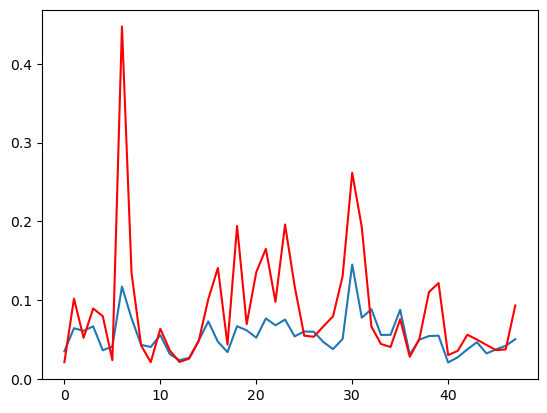

In [472]:
plt.plot(np.load('traindata/test_data_BTCcoin_5m_logreturn.npy')[0][:,0])
plt.plot(np.load('traindata/test_data_BTCcoin_5m_rv.npy')[0][:,0],c = 'r')

### Coin Vol / Daily

In [524]:
coin_eda = np.load('test_coin_all.npy').transpose(1,0)

In [525]:
coin_eda.shape

(15, 16718)

In [660]:
day = 6
day_max_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
day_min_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
day_mean_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
col = 0
for i in coin_eda:
    for k in range(i.shape[0]//day):
        day_max = np.max(i[k:k+day])
        day_min = np.min(i[k:k+day])
        day_mean = np.mean(i[k:k+day])
        day_max_list[col,k] = day_max
        day_min_list[col,k] = day_min
        day_mean_list[col,k] = day_mean
    col +=1

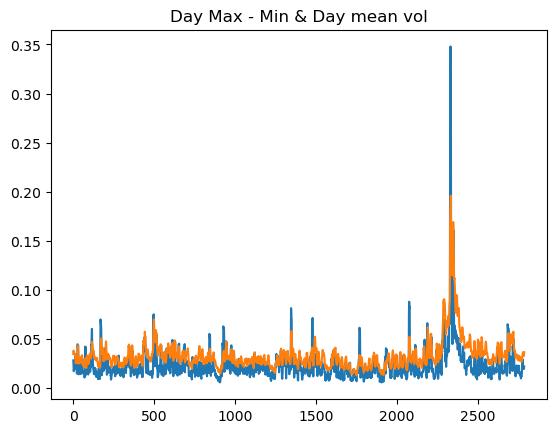

In [661]:
plt.plot(day_max_list.mean(axis=0)-day_min_list.mean(axis=0))
plt.plot(day_mean_list.mean(axis=0))
plt.title('Day Max - Min & Day mean vol')
plt.show() 

In [617]:
day = 12
day_max_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
day_min_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
day_mean_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
col = 0
for i in coin_eda:
    for k in range(i.shape[0]//day):
        day_max = np.max(i[k:k+day])
        day_min = np.min(i[k:k+day])
        day_mean = np.mean(i[k:k+day])
        day_max_list[col,k] = day_max
        day_min_list[col,k] = day_min
        day_mean_list[col,k] = day_mean
    col +=1

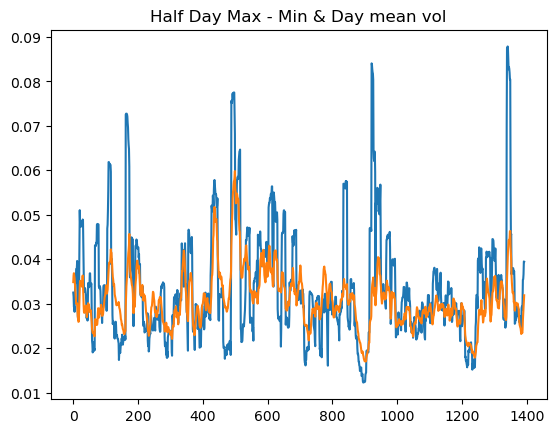

In [618]:
plt.plot(day_max_list.mean(axis=0)-day_min_list.mean(axis=0))
plt.plot(day_mean_list.mean(axis=0))
plt.title('Half Day Max - Min & Day mean vol')
plt.show() 

In [640]:
day = 24
day_max_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
day_min_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
day_mean_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
col = 0
for i in coin_eda:
    for k in range(i.shape[0]//day):
        day_max = np.max(i[k:k+day])
        day_min = np.min(i[k:k+day])
        day_mean = np.mean(i[k:k+day])
        day_max_list[col,k] = day_max
        day_min_list[col,k] = day_min
        day_mean_list[col,k] = day_mean
    col +=1

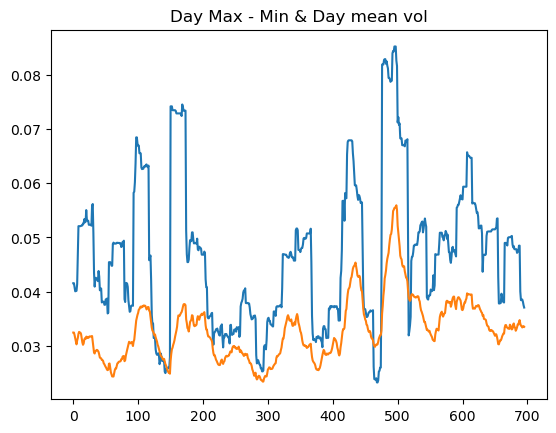

In [642]:
plt.plot(day_max_list.mean(axis=0)-day_min_list.mean(axis=0))
plt.plot(day_mean_list.mean(axis=0))
plt.title('Day Max - Min & Day mean vol')
plt.show() # 하루의 평균 Volatility 와 최고 최소 Volatility의 차이가 심하기 때문에 Hourly 리벨런싱이 필요하다

In [643]:
day = 48
day_max_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
day_min_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
day_mean_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
col = 0
for i in coin_eda:
    for k in range(i.shape[0]//day):
        day_max = np.max(i[k:k+day])
        day_min = np.min(i[k:k+day])
        day_mean = np.mean(i[k:k+day])
        day_max_list[col,k] = day_max
        day_min_list[col,k] = day_min
        day_mean_list[col,k] = day_mean
    col +=1

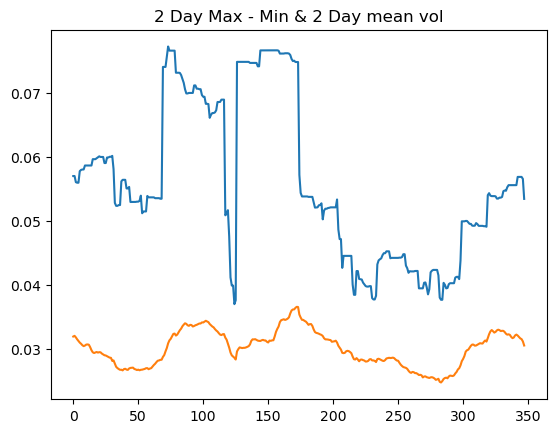

In [644]:
plt.plot(day_max_list.mean(axis=0)-day_min_list.mean(axis=0))
plt.plot(day_mean_list.mean(axis=0))
plt.title('2 Day Max - Min & 2 Day mean vol')
plt.show() # 하루의 평균 Volatility 와 최고 최소 Volatility의 차이가 심하기 때문에 Hourly 리벨런싱이 필요하다

In [645]:
day = 144
day_max_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
day_min_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
day_mean_list = np.zeros((coin_eda.shape[0],coin_eda.shape[1]//day), dtype='float32')
col = 0
for i in coin_eda:
    for k in range(i.shape[0]//day):
        day_max = np.max(i[k:k+day])
        day_min = np.min(i[k:k+day])
        day_mean = np.mean(i[k:k+day])
        day_max_list[col,k] = day_max
        day_min_list[col,k] = day_min
        day_mean_list[col,k] = day_mean
    col +=1

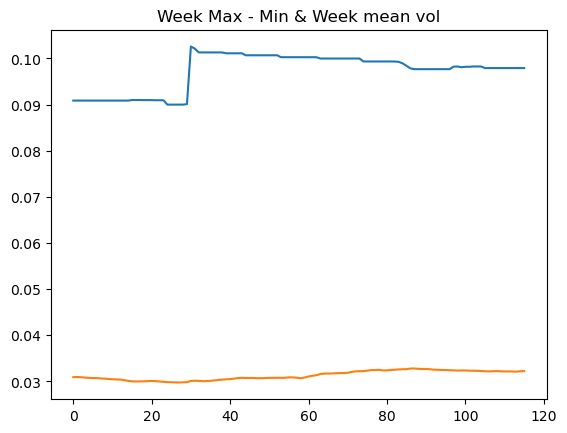

In [646]:
plt.plot(day_max_list.mean(axis=0)-day_min_list.mean(axis=0))
plt.plot(day_mean_list.mean(axis=0))
plt.title('Week Max - Min & Week mean vol')
plt.show() # 하루의 평균 Volatility 와 최고 최소 Volatility의 차이가 심하기 때문에 Hourly 리벨런싱이 필요하다

### Rolling Windows Exp

In [504]:
mu = np.load('price/predict_mu_5m_rv_BTCUSDT.npy')
sigma = np.load('price/predict_sigma_5m_rv_BTCUSDT.npy')
val = np.load('price/value_5m_rv_BTCUSDT.npy')

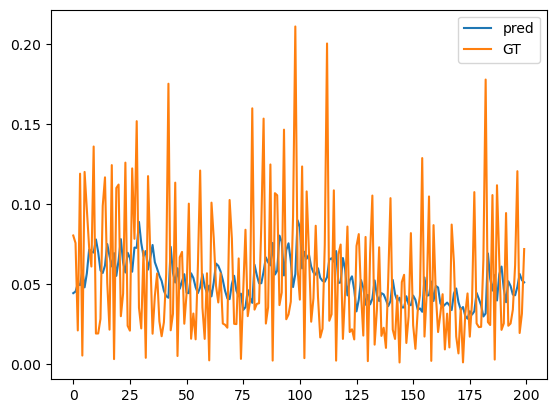

In [507]:
import matplotlib.pyplot as plt
plt.plot(mu[0:200],label = 'pred')
plt.plot(val[0:200],label = 'GT')
plt.legend()

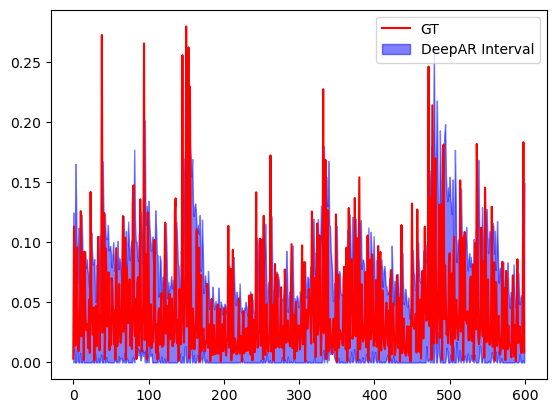

In [506]:
x = range(600)
l = []
for i in (mu[200:800] - 1.5*sigma[200:800]):
    if i >=0:
        l.append(i)
    else:
        l.append(0)
y1 = l
#y1 = mu[200:800] - 1.5*sigma[200:800]
y2 = mu[200:800] + 1.5*sigma[200:800]
plt.plot(val[200:800],color = 'r', alpha=1,label = 'GT')
plt.fill_between(x,y1,y2, alpha=0.5, color='blue',label = 'DeepAR Interval')
plt.legend()

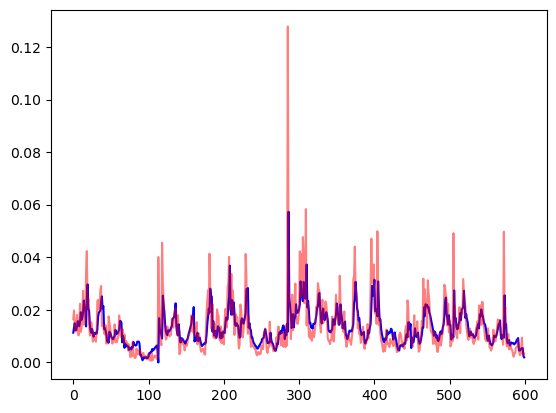

In [171]:
plt.plot(mu[200:800],color = 'b')
plt.plot(val[200:800],color = 'r',alpha = 0.5)

In [ ]:
['BNBUSDT','DOGEUSDT','SOLUSDT']

In [480]:
mu = np.load('price/predict_mu_5m_DOTUSDT.npy')
sigma = np.load('price/predict_sigma_5m_DOTUSDT.npy')
val = np.load('price/value_5m_DOTUSDT.npy')

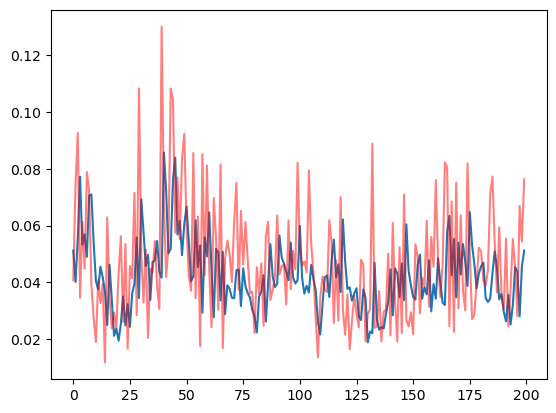

In [487]:
import matplotlib.pyplot as plt
plt.plot(mu[:200])
plt.plot(val[:200],c='r',alpha = 0.5)

Text(0.5, 1.0, 'DeepAR Interval BNB')

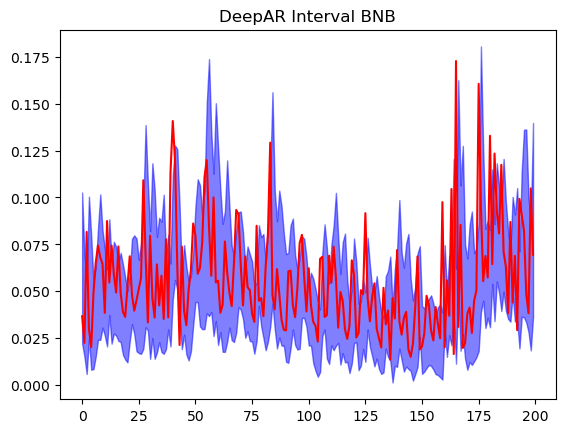

In [483]:
x = range(200)
l = []
for i in (mu[200:400] - 1.0*sigma[200:400]):
    if i >=0:
        l.append(i)
    else:
        l.append(0)
y1 = l
y2 = mu[200:400] + 1.0*sigma[200:400]
plt.plot(val[200:400],color = 'r', alpha=1)
plt.fill_between(x,y1,y2, alpha=0.5, color='blue')
plt.title('DeepAR Interval BNB')

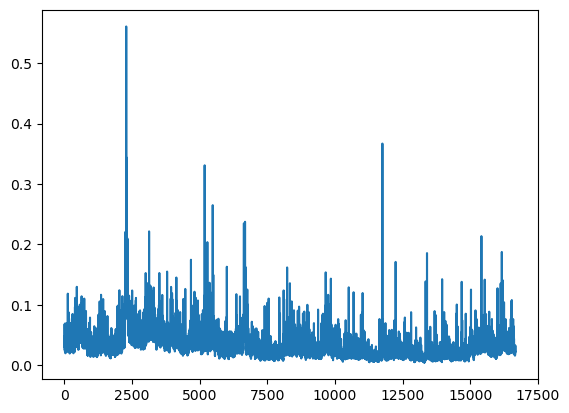

In [372]:
plt.plot(val)

In [1492]:
import numpy as np
import matplotlib.pyplot as plt
mu = np.load('nbeats/BCH/predict_mu1.npy').reshape(-1)
val1 = np.load('nbeats/BCH/label2.npy').reshape(-1)
val = np.load('nbeats/BCH/label.npy').reshape(-1)
mu1= np.load('nbeats/BCH/predict_mu1.npy').reshape(-1)
muar = np.load('price/predict_mu_BCHUSDT.npy')
valar = np.load('price/value_BCHUSDT.npy')

<function matplotlib.pyplot.show(close=None, block=None)>

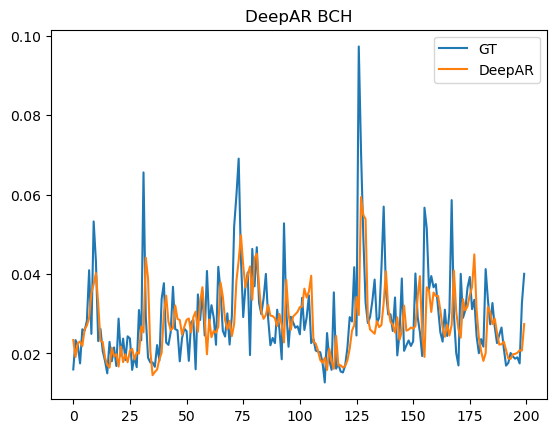

In [1496]:
plt.plot(valar[:200],label = 'GT')
plt.plot(muar[:200],label = 'DeepAR')
#plt.plot(muar[:200],label = 'DeepAR')
plt.title('DeepAR BCH')
plt.legend()
plt.show

In [1473]:
import numpy as np
import matplotlib.pyplot as plt
mu = np.load('nbeats/ETC/predict_mu.npy').reshape(-1)
val1 = np.load('nbeats/ETC/label2.npy').reshape(-1)
val = np.load('nbeats/ETC/label.npy').reshape(-1)
mu1= np.load('nbeats/ETC/predict_mu1.npy').reshape(-1)

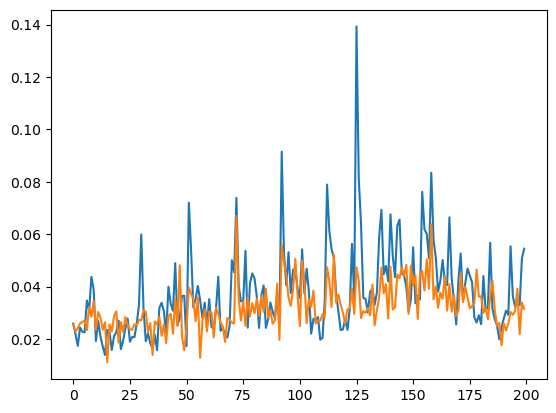

In [1474]:
plt.plot(val1[:200])
plt.plot(mu1[2:200+2])

In [1475]:
mu = np.load('price/predict_mu_ETCUSDT.npy')
sigma = np.load('price/predict_sigma_ETCUSDT.npy')
val = np.load('price/value_ETCUSDT.npy')

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

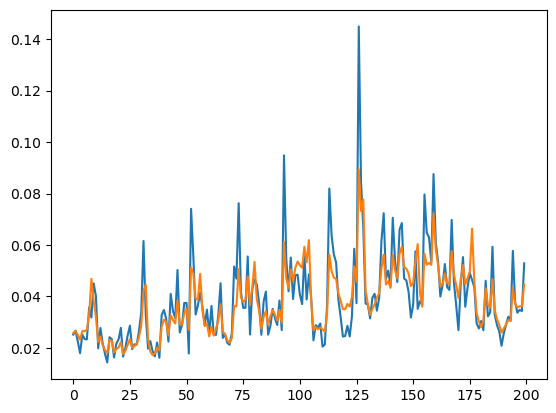

In [1477]:
plt.plot(val[:200])
plt.plot(mu[1:200+1])
plt.title

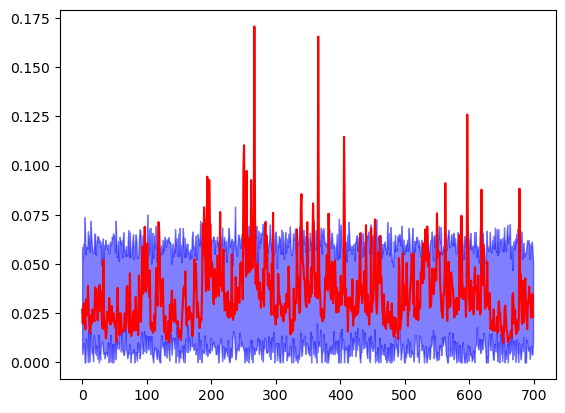

In [328]:
x = range(700)
l = []
for i in (mu[200:900] - 1.5*sigma[200:900]):
    if i >=0:
        l.append(i)
    else:
        l.append(0)
y1 = l
y2 = mu[200:900] + 1.5*sigma[200:900]
plt.plot(val[200:900],color = 'r', alpha=1)
plt.fill_between(x,y1,y2, alpha=0.5, color='blue')

In [677]:
mu = np.load('LSTM/inferenceLSTM/predict_mu_ETCUSDT.npy')
sigma = np.load('LSTM/inferenceLSTM/predict_sigma_ETCUSDT.npy')
val = np.load('LSTM/inferenceLSTM/value_ETCUSDT.npy')

In [679]:
mu.shape

(1000, 1, 1, 128)

## Portfolio

In [1356]:
np.save('price_hour.npy',price_hour)
np.save('price_data',price_data)

In [1388]:
hour = np.load('price_hour.npy')
# 47개를 가지고 48번째 예측 시작 ~ 1048번째부터 예측된 volatility
# 그렇다면 1047부터 시작해서 price를 계산하고 해당 Price에서 나온 

In [1358]:
pred = []
for j in coin_name:
    for i in os.listdir('price'):
        if 'mu' in i:
            if j in i:
                print(i)
                stoc = np.load(os.path.join('price',i))
                pred.append(stoc)

predict_mu_ICPUSDT.npy
predict_mu_DOTUSDT.npy
predict_mu_BNBUSDT.npy
predict_mu_BCHUSDT.npy
predict_mu_LINKUSDT.npy
predict_mu_TRXUSDT.npy
predict_mu_DOGEUSDT.npy
predict_mu_SOLUSDT.npy
predict_mu_ADAUSDT.npy
predict_mu_ATOMUSDT.npy
predict_mu_XRPUSDT.npy
predict_mu_ETHUSDT.npy
predict_mu_AVAXUSDT.npy
predict_mu_ETCUSDT.npy
predict_mu_BTCUSDT.npy


In [1359]:
pred_nbeat = []
for j in coin_name:
    for i in os.listdir('nbeats'):
        if i in j[:3]:
            print(i)
            stoc = np.load(os.path.join(f'nbeats/{i}','predict_mu1.npy'))
            pred_nbeat.append(stoc)

ICP
DOT
BNB
BCH
LIN
TRX
DOG
SOL
ADA
ATO
XRP
ETH
AVA
ETC
BTC


In [1360]:
trading_days = 200
test_size = 39007

In [1361]:
pred_vol_nbeats = np.array(pred_nbeat)

In [1387]:
price = np.load('price_data.npy') # 1000시간 시간 당 수익률

In [1406]:
price.shape,hour.shape

((15, 55725), (15, 55725, 61))

In [1419]:
hour[-1][:10,-1]

array([4308.83, 4315.32, 4324.35, 4349.99, 4360.69, 4441.1 , 4470.  ,
       4427.3 , 4411.  , 4460.  ])

In [1378]:
hourly = hour[:,test_size + 46:,:]
price = price[:,test_size + 46:]

In [1401]:
hour.shape,hour[-1][test_size-1][-1]

((15, 55725, 61), 37085.68)

In [1402]:
price.shape, price[-1][test_size-1]

((15, 55725), 37066.15)

In [311]:
price = hourly

In [312]:
freq = price.shape[2]
row = price.shape[1]
columns = price.shape[0]
stock_return = np.zeros([row-1,columns,freq])
for j in range(columns):
    for i in range(row-1):
        #stock_return[i,j] = ((price[j,i+1] - price[j,i])/price[j,i])
        for k in range(freq-1):
            stock_return[i,j,k] = ((price[j,i,k+1] - price[j,i,k])/price[j,i,k])

In [ ]:
    aa = stock_return[0].max(axis=1)
    bb = stock_return[0].min(axis=1)
    for e in range(trading_days-1):
        for i in stock_return[e]:
            z = 0
            j = 0
            for k in i:
                i[z] = (k - bb[j])/aa[j]
                z+=1
            j+=1

In [919]:
freq//4

15

In [926]:
stock_return.shape

(167, 15, 1)

In [1072]:
EqualWeightVector.sum()

0.9999999999999999

In [1183]:
price[j,i,-1]/price[j,i,0]

0.9968888568361134

In [1208]:
train_size

NameError: name 'train_size' is not defined

In [1350]:
import random
np.set_printoptions(precision=5, suppress = True)
PortfolioSize = columns # 해당 가정은 포트폴리오에서
eqwe = []
eqwe_risk = []
invol = []
invol_risk = [ ]
dar = []
dar_risk = []
nbeat = []
nbeat_risk = []
trading_days = 24
test_size = 39007
interval = 48
sim = 10
for i in range(sim):
   # price = np.load('price_test.npy')
    seed_val = random.randint(1,16000)
   # price = price[:,seed_val + interval -1 :seed_val + interval+trading_days-1]
    hourly = hour[:,seed_val + test_size+interval-2:seed_val + test_size+trading_days+interval-2,:]
    pred_vol = np.array(pred)[:,seed_val-1:seed_val +trading_days-1]
    pred_vol_nbeats = np.array(pred_nbeat)[:,seed_val:seed_val +trading_days].reshape(15,-1)
    price = hourly
    a = []
    b=[]
    freq = price.shape[2]
    row = price.shape[1]
    columns = price.shape[0]
    s_size = 1
    sam_freq = freq // s_size
    stock_return = np.zeros([row-1,columns,sam_freq])
    #stock_return = np.zeros([row-1,columns,1])
    for j in range(columns):
        for i in range(row-1):
            #stock_return[i,j,0] = np.log(price[j,i,-1]/price[j,i,0]) + 1e-6
            #stock_return[i,j] = ((price[j,i+1] - price[j,i])/price[j,i])
            for k in range(sam_freq-1): #1분당이 아니라 1시간 기준으로 끝과 끝으로 해야함
                d = k*s_size
                stock_return[i,j,k] = np.log((price[j,i,d+ s_size]/price[j,i,d])) 
    for step in range(trading_days-1):
        meanReturns = np.mean(stock_return[step], axis = 1) # 평균 리턴 값 15X15
        covReturns = np.cov(stock_return[step]) + 1e-4 # 각 리턴에 대한 공분산 # Step 에 대해서 각각 나와야함 Step X 15 X 15
        EqualWeightVector = np.ones((1,PortfolioSize))*(1.0/PortfolioSize) # 동일 웨이트
        EqWgtPortfolioRisk = np.sqrt(np.matmul((np.matmul(EqualWeightVector,covReturns)), 
                             np.transpose(EqualWeightVector)))
        EqWgtAnnPortfolioRisk = EqWgtPortfolioRisk*np.sqrt(trading_days)*100
        EqWgtPortfolioReturn = np.matmul(EqualWeightVector, np.transpose(meanReturns)) # 1X15 @ 15X1 : 1X1
        EqWgtAnnPortfolioReturn = trading_days*EqWgtPortfolioReturn * 100
        a.append(EqWgtAnnPortfolioReturn )
        b.append(EqWgtAnnPortfolioRisk)
    eqwe.append(a)
    eqwe_risk.append(b)
    a1 = []
    b1 = []
    for step in range(trading_days-1):
        meanReturns = np.mean(stock_return[step], axis = 1)
        covReturns = np.cov(stock_return[step]) + 1e-4
        InvVolWeightAssets_Risk = np.sqrt(np.diagonal(covReturns))
        InvVolWeightAssets_ReciprocalRisk = 1.0/InvVolWeightAssets_Risk
        InvVolWeightAssets_ReciprocalRisk_Sum = np.sum(InvVolWeightAssets_ReciprocalRisk)
        InvVolWeightAssets_Weights = InvVolWeightAssets_ReciprocalRisk / \
                                     InvVolWeightAssets_ReciprocalRisk_Sum
        InvVolWeightPortfolio_Risk = np.sqrt(np.matmul((np.matmul(InvVolWeightAssets_Weights,\
                                     covReturns)), np.transpose(InvVolWeightAssets_Weights)))

        #annualized risk and return
        InvVolWeightPortfolio_AnnRisk = np.sqrt(trading_days)* InvVolWeightPortfolio_Risk *100
        InvVolWeightPortfolio_AnnReturn = trading_days* np.matmul(InvVolWeightAssets_Weights,\
                                          np.transpose(meanReturns)) *100
        a1.append(InvVolWeightPortfolio_AnnReturn)
        b1.append(InvVolWeightPortfolio_AnnRisk)
    invol.append(a1)
    invol_risk.append(b1)
    a2 = []
    b2 = []
    for step in range(trading_days-1):
        meanReturns = np.mean(stock_return[step], axis = 1)
        covReturns = np.cov(stock_return[step]) + 1e-4
        InvVolWeightAssets_Risk = pred_vol[:,step]

        InvVolWeightAssets_ReciprocalRisk = 1.0/InvVolWeightAssets_Risk
        InvVolWeightAssets_ReciprocalRisk_Sum = np.sum(InvVolWeightAssets_ReciprocalRisk)
        InvVolWeightAssets_Weights = InvVolWeightAssets_ReciprocalRisk / \
                                     InvVolWeightAssets_ReciprocalRisk_Sum
        InvVolWeightPortfolio_Risk = np.sqrt(np.matmul((np.matmul(InvVolWeightAssets_Weights,\
                                     covReturns)), np.transpose(InvVolWeightAssets_Weights)))

        #annualized risk and return
        InvVolWeightPortfolio_AnnRisk = np.sqrt(trading_days)* InvVolWeightPortfolio_Risk *100
        InvVolWeightPortfolio_AnnReturn = trading_days* np.matmul(InvVolWeightAssets_Weights,\
                                          np.transpose(meanReturns)) *100
        a2.append(InvVolWeightPortfolio_AnnReturn)
        b2.append(InvVolWeightPortfolio_AnnRisk )
    dar.append(a2)
    dar_risk.append(b2)
    a3 = []
    b3 = []
    for step in range(trading_days-1):
        meanReturns = np.mean(stock_return[step], axis = 1)
        covReturns = np.cov(stock_return[step]) + 1e-4
        InvVolWeightAssets_Risk = pred_vol_nbeats[:,step]

        InvVolWeightAssets_ReciprocalRisk = 1.0/InvVolWeightAssets_Risk
        InvVolWeightAssets_ReciprocalRisk_Sum = np.sum(InvVolWeightAssets_ReciprocalRisk)
        InvVolWeightAssets_Weights = InvVolWeightAssets_ReciprocalRisk / \
                                     InvVolWeightAssets_ReciprocalRisk_Sum
        InvVolWeightPortfolio_Risk = np.sqrt(np.matmul((np.matmul(InvVolWeightAssets_Weights,\
                                     covReturns)), np.transpose(InvVolWeightAssets_Weights)))

        #annualized risk and return
        InvVolWeightPortfolio_AnnRisk = np.sqrt(trading_days)* InvVolWeightPortfolio_Risk *100
        InvVolWeightPortfolio_AnnReturn = trading_days* np.matmul(InvVolWeightAssets_Weights,\
                                          np.transpose(meanReturns)) *100
        a3.append(InvVolWeightPortfolio_AnnReturn)
        b3.append(InvVolWeightPortfolio_Risk)
    nbeat.append(a3)
    nbeat_risk.append(b3)

In [1351]:
import pdb
return_sim = np.zeros([sim,4])
ss = []
for i in range(sim):
    simul_list = [] 
    sim_list = [eqwe[i],invol[i],dar[i],nbeat[i]]
    price_score = []
    for k in sim_list: # 
        initial = 100
        simul = []
        k = np.array(k)
        try:
            kkk = 1
            k = np.array(pd.Series(k).fillna(0))
        except:
            kkk=1
            k = np.array(pd.Series(k[:,0]).fillna(0))
        for p in k:
            initial = initial + initial*(p/100)
            simul.append(initial)
        price_score.append(initial)
    simul_list.append(simul)
    for s in range(return_sim.shape[1]):
        return_sim[i,s] = price_score[s]
    ss.append(simul_list)

In [1352]:
return_sim.mean(axis=0),return_sim.std(axis=0)

(array([99.84712, 99.83917, 99.84663, 99.36988]),
 array([1.39053, 1.37801, 1.2303 , 1.56852]))

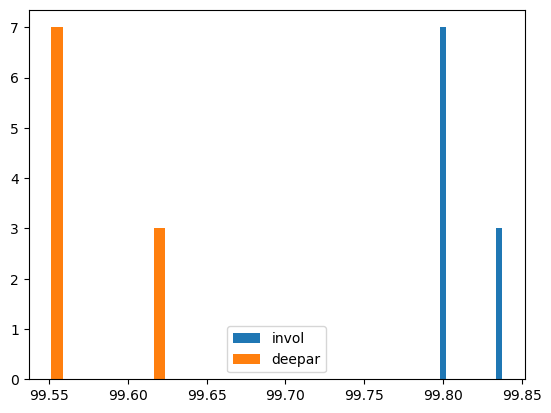

In [1336]:
#plt.hist(return_sim[:,0],alpha = 0.5,label = 'eqwe')
plt.hist(return_sim[:,1],label = 'invol')
plt.hist(return_sim[:,2],label = 'deepar')
#plt.hist(return_sim[:,3],alpha = 0.5,label = 'nbeat')
plt.legend()
plt.show()

In [1337]:
a2 = np.array(pd.Series(a2).fillna(0))
initial = 100
r2 = []
for i in a2:
    if i <0:
        initial = initial + initial*(i/100)
    else:
        initial =  initial + initial*(i/100)
    r2.append(initial)

In [458]:
initial = 100
r = []
for i in a:
    if i <0:
        initial = initial + initial*(i/100)
    else:
        initial =  initial + initial*(i/100)
    r.append(initial)

In [459]:
a1 = []
for step in range(1000-1):
    meanReturns = np.mean(stock_return[step], axis = 1)
    covReturns = np.cov(stock_return[step])
    InvVolWeightAssets_Risk = np.sqrt(np.diagonal(covReturns))
    InvVolWeightAssets_ReciprocalRisk = 1.0/InvVolWeightAssets_Risk
    InvVolWeightAssets_ReciprocalRisk_Sum = np.sum(InvVolWeightAssets_ReciprocalRisk)
    InvVolWeightAssets_Weights = InvVolWeightAssets_ReciprocalRisk / \
                                 InvVolWeightAssets_ReciprocalRisk_Sum
    InvVolWeightPortfolio_Risk = np.sqrt(np.matmul((np.matmul(InvVolWeightAssets_Weights,\
                                 covReturns)), np.transpose(InvVolWeightAssets_Weights)))

    #annualized risk and return
    InvVolWeightPortfolio_AnnRisk = np.sqrt(60)* InvVolWeightPortfolio_Risk *100
    InvVolWeightPortfolio_AnnReturn = 60* np.matmul(InvVolWeightAssets_Weights,\
                                      np.transpose(meanReturns)) *100
    a1.append(InvVolWeightPortfolio_AnnReturn)


IndexError: index 499 is out of bounds for axis 0 with size 499

In [325]:
a2 = []
for step in range(1000-1):
    meanReturns = np.mean(stock_return[step], axis = 1)
    covReturns = np.cov(stock_return[step])
    InvVolWeightAssets_Risk = np.sqrt(pred_vol[:,step])
    InvVolWeightAssets_ReciprocalRisk = 1.0/InvVolWeightAssets_Risk
    InvVolWeightAssets_ReciprocalRisk_Sum = np.sum(InvVolWeightAssets_ReciprocalRisk)
    InvVolWeightAssets_Weights = InvVolWeightAssets_ReciprocalRisk / \
                                 InvVolWeightAssets_ReciprocalRisk_Sum
    InvVolWeightPortfolio_Risk = np.sqrt(np.matmul((np.matmul(InvVolWeightAssets_Weights,\
                                 covReturns)), np.transpose(InvVolWeightAssets_Weights)))

    #annualized risk and return
    InvVolWeightPortfolio_AnnRisk = np.sqrt(60)* InvVolWeightPortfolio_Risk *100
    InvVolWeightPortfolio_AnnReturn = 60* np.matmul(InvVolWeightAssets_Weights,\
                                      np.transpose(meanReturns)) *100
    a2.append(InvVolWeightPortfolio_AnnReturn)
    print("Annualized Portfolio Risk: %4.2f" % InvVolWeightPortfolio_AnnRisk,"%\n")
    print("Annualized Expected Portfolio Return: %4.2f" % InvVolWeightPortfolio_AnnReturn,"%")


Annualized Portfolio Risk: 0.26 %

Annualized Expected Portfolio Return: -0.15 %
Annualized Portfolio Risk: 0.21 %

Annualized Expected Portfolio Return: 0.01 %
Annualized Portfolio Risk: 0.20 %

Annualized Expected Portfolio Return: -0.28 %
Annualized Portfolio Risk: 0.21 %

Annualized Expected Portfolio Return: 0.27 %
Annualized Portfolio Risk: 0.20 %

Annualized Expected Portfolio Return: -0.12 %
Annualized Portfolio Risk: 0.18 %

Annualized Expected Portfolio Return: -0.00 %
Annualized Portfolio Risk: 0.18 %

Annualized Expected Portfolio Return: -0.05 %
Annualized Portfolio Risk: 0.23 %

Annualized Expected Portfolio Return: 0.30 %
Annualized Portfolio Risk: 0.28 %

Annualized Expected Portfolio Return: -0.16 %
Annualized Portfolio Risk: 0.36 %

Annualized Expected Portfolio Return: -1.70 %
Annualized Portfolio Risk: 0.34 %

Annualized Expected Portfolio Return: 1.03 %
Annualized Portfolio Risk: 0.23 %

Annualized Expected Portfolio Return: -0.60 %
Annualized Portfolio Risk: 0.21 

IndexError: index 167 is out of bounds for axis 0 with size 167

In [327]:
a2 = np.array(pd.Series(a2).fillna(0))
initial = 100
r2 = []
for i in a2:
    if i <0:
        initial = initial + initial*(i/100)
    else:
        initial =  initial + initial*(i/100)
    r2.append(initial)

In [328]:
pred_vol

array([[0.04632, 0.04154, 0.04032, ..., 0.03713, 0.0367 , 0.03509],
       [0.0192 , 0.02002, 0.02363, ..., 0.02713, 0.02448, 0.02762],
       [0.00527, 0.00324, 0.00294, ..., 0.00277, 0.00366, 0.00293],
       ...,
       [0.02423, 0.02577, 0.02872, ..., 0.03331, 0.03089, 0.03   ],
       [0.01946, 0.01706, 0.03487, ..., 0.02174, 0.02831, 0.03193],
       [0.02389, 0.01894, 0.01537, ..., 0.02226, 0.02297, 0.01952]])

In [889]:
print(r[-1])
print(r1[-1])
print(r2[-1])

[104.93089]
97.23512101854061
74.56275232295185


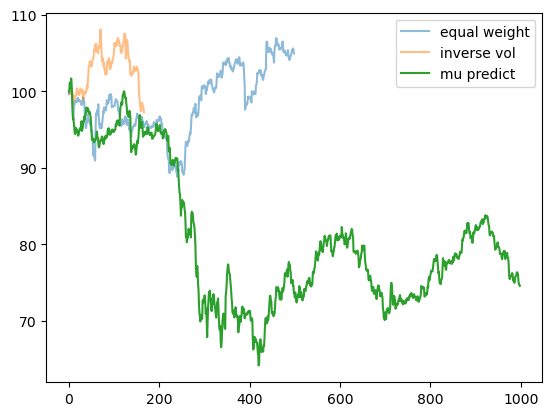

In [893]:
plt.plot(r,label = 'equal weight',alpha = 0.5)
plt.plot(r1,label = 'inverse vol',alpha = 0.5)
plt.plot(r2,label = 'mu predict',alpha = 1)
plt.legend()
plt.show()

In [888]:
import numpy as np

def equal_weight_portfolio_simulation(num_assets, num_time_periods, mean_returns, std_dev_returns):
    portfolio_returns = []
    portfolio_values = []

    for _ in range(num_time_periods):
        # Generate random returns for each asset
        returns = np.random.normal(mean_returns, std_dev_returns, num_assets)
        
        # Calculate portfolio return (equal weights)
        portfolio_return = np.mean(returns)
        portfolio_returns.append(portfolio_return)
        
        # Update portfolio value (assuming starting value is 1)
        if len(portfolio_values) == 0:
            portfolio_values.append(1)
        else:
            portfolio_value = portfolio_values[-1] * (1 + portfolio_return)
            portfolio_values.append(portfolio_value)

    return portfolio_returns, portfolio_values

# Parameters
num_assets = 15
num_time_periods = 168
mean_returns = 0.05  # Mean return of the assets
std_dev_returns = 0.1  # Standard deviation of returns of the assets

# Run simulation
returns, values = equal_weight_portfolio_simulation(num_assets, num_time_periods, mean_returns, std_dev_returns)

# Print some results
print("Average portfolio return:", np.mean(returns))
print("Standard deviation of portfolio return:", np.std(returns))
print("Final portfolio value:", values[-1])

Average portfolio return: 0.04718055977384055
Standard deviation of portfolio return: 0.021710056687994302
Final portfolio value: 2174.510485870666


In [236]:
import numpy as np

def inverse_volatility_portfolio_simulation(num_assets, num_time_periods, mean_returns, std_dev_returns):
    portfolio_returns = []
    portfolio_values = []

    for _ in range(num_time_periods):
        # Generate random returns for each asset
        returns = np.random.normal(mean_returns, std_dev_returns, num_assets)
        
        # Calculate inverse volatility weights
        volatilities = np.std(returns)
        weights = 1 / volatilities
        weights /= np.sum(weights)  # Normalize weights to sum up to 1
        
        # Calculate portfolio return (inverse volatility weights)
        portfolio_return = np.dot(weights, returns)
        portfolio_returns.append(portfolio_return)
        
        # Update portfolio value (assuming starting value is 1)
        if len(portfolio_values) == 0:
            portfolio_values.append(1)
        else:
            portfolio_value = portfolio_values[-1] * (1 + portfolio_return)
            portfolio_values.append(portfolio_value)

    return portfolio_returns, portfolio_values

# Parameters
num_assets = 15
num_time_periods = 1000
mean_returns = 0.05  # Mean return of the assets
std_dev_returns = 0.1  # Standard deviation of returns of the assets

# Run simulation
returns, values = inverse_volatility_portfolio_simulation(num_assets, num_time_periods, mean_returns, std_dev_returns)

# Print some results
print("Average portfolio return:", np.mean(returns))
print("Standard deviation of portfolio return:", np.std(returns))
print("Final portfolio value:", values[-1])

Average portfolio return: 0.050263184444211434
Standard deviation of portfolio return: 0.10041500337288824
Final portfolio value: [1.71785e+19 4.72983e+20 1.25856e+20 1.33614e+19 7.96987e+17 2.66266e+17
 2.70696e+21 1.27865e+18 8.68004e+16 2.28434e+19 1.64430e+18 1.35772e+20
 1.25036e+22 1.05179e+17 1.22159e+21]
